<a href="https://colab.research.google.com/github/kartickgupta/shared-task-2021/blob/main/Shared_Task_2021_RoBERTa_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
!pip install textaugment
import nltk
nltk.download('all')

     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 1.2 MB 8.1 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=ff2e926664ccadb85be9ca13273d9ee23134485c733e81084705ef1edcd0f1e9
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocr

True

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from google.colab import drive
from textaugment import Wordnet, EDA, word2vec, Translate
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import gensim
import re
import matplotlib.pyplot as plt
import seaborn as sns
!pip3 install tensorflow_text
import tensorflow_text
!pip install -q tf-models-official
!pip install -q -U tensorflow-text
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab
import tensorflow_hub as hub
import tensorflow_text as tf_text
from tqdm import tqdm

     |████████████████████████████████| 4.4 MB 2.5 MB/s 
     |████████████████████████████████| 1.8 MB 4.3 MB/s 
     |████████████████████████████████| 352 kB 59.5 MB/s 
     |████████████████████████████████| 1.2 MB 43.1 MB/s 
     |████████████████████████████████| 1.1 MB 68.0 MB/s 
     |████████████████████████████████| 90 kB 8.4 MB/s 
     |████████████████████████████████| 37.1 MB 1.2 MB/s 
     |████████████████████████████████| 636 kB 42.3 MB/s 
     |████████████████████████████████| 99 kB 8.7 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 213 kB 66.6 MB/s 


In [ ]:
!pip3 install transformers

     |████████████████████████████████| 2.9 MB 2.0 MB/s 
     |████████████████████████████████| 3.3 MB 31.5 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 895 kB 58.2 MB/s 


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/Shared Task 2021/global-headline-only.csv', 'r') as f:
    df = pd.read_csv(f)

df.head()

,data_id,event_date,year,event_type,sub_event_type,region,country,location,notes,cleaned,lemmatized,stemmed
0,8378880,09-07-2021,2021,Explosions/Remote violence,Shelling/artillery/missile attack,Middle East,Syria,Arnaba,"On 9 July 2021, regime forces shelled Arnaba t...",regime forces shelled Arnaba town in Idleb cou...,regime force shelled arnaba town idleb country...,regim forc shell arnaba town idleb countrysid ...
1,8378881,09-07-2021,2021,Explosions/Remote violence,Shelling/artillery/missile attack,Middle East,Syria,Balyun,"On 9 July 2021, regime forces shelled Balyun t...",regime forces shelled Balyun town and its vici...,regime force shelled balyun town vicinity idle...,regim forc shell balyun town vicin idleb count...
2,8381441,09-07-2021,2021,Protests,Peaceful protest,East Asia,South Korea,Jinju,"On 9 July 2021, local veterans' organizations,...",local veterans organizations including the Kor...,local veteran organization including korean wa...,local veteran organ includ korean war veteran ...
3,8383746,09-07-2021,2021,Riots,Violent demonstration,South Asia,Pakistan,Larkana,"On 9 July 2021, prisoners held a demonstration...",prisoners held a demonstration and set wood an...,prisoner held demonstration set wood clothes f...,prison held demonstr set wood cloth fire larka...
4,8381699,09-07-2021,2021,Violence against civilians,Attack,Southeast Asia,Myanmar,Hpa Yar Gyi,"On 9 July 2021, in Hpa Yar Gyi village (Thongw...",in Hpa Yar Gyi village the village administra...,hpa yar gyi village village administrator shot...,hpa yar gyi villag villag administr shot three...


In [ ]:
correct_format = ['ABDUCT_DISSAP',
'AGREEMENT',
'AIR_STRIKE',
'ARMED_CLASH',
'ARREST',
'ART_MISS_ATTACK',
'ATTACK',
'CHANGE_TO_GROUP_ACT',
'CHEM_WEAP',
'DISR_WEAP',
'FORCE_AGAINST_PROTEST',
'GOV_REGAINS_TERIT',
'GRENADE',
'HQ_ESTABLISHED',
'MOB_VIOL',
'NON_STATE_ACTOR_OVERTAKES_TER',
'NON_VIOL_TERRIT_TRANSFER',
'OTHER',
'PEACE_PROTEST',
'PROPERTY_DISTRUCT',
'PROTEST_WITH_INTER',
'REM_EXPLOS',
'SEX_VIOL',
'SUIC_BOMB',
'VIOL_DEMONSTR']

In [ ]:
dict_list = list(event_types_dict.keys())

In [ ]:
dict_list

correct_format_dict = {'Abduction/forced disappearance':'ABDUCT_DISSAP',
                       'Agreement': 'AGREEMENT',
                        'Air/drone strike' : 'AIR_STRIKE',
                         'Armed clash' : 'ARMED_CLASH',
                       'Arrests' : 'ARREST',
                       'Attack' : 'ATTACK',
                       'Change to group/activity' : 'CHANGE_TO_GROUP_ACT',
                       'Chemical weapon' : 'CHEM_WEAP',
                       'Disrupted weapons use' : 'DISR_WEAP',
                       'Excessive force against protesters' : 'FORCE_AGAINST_PROTEST',
                       'Government regains territory' : 'GOV_REGAINS_TERIT',
                       'Grenade' : 'GRENADE',
                        'Headquarters or base established' : 'HQ_ESTABLISHED',
                       'Looting/property destruction' : 'PROPERTY_DISTRUCT',
                       'Mob violence' : 'MOB_VIOL',
                       'Non-state actor overtakes territory' : 'NON_STATE_ACTOR_OVERTAKES_TER',
                       'Non-violent transfer of territory' : 'NON_VIOL_TERRIT_TRANSFER',
                       'Other' : 'OTHER',
                        'Peaceful protest' : 'PEACE_PROTEST',
                       'Protest with intervention' : 'PROTEST_WITH_INTER',
                       'Remote explosive/landmine/IED' : 'REM_EXPLOS',
                       'Sexual violence' : 'SEX_VIOL',
                       'Shelling/artillery/missile attack' : 'ART_MISS_ATTACK',
                       'Suicide bomb' : 'SUIC_BOMB',
                        'Violent demonstration' : 'VIOL_DEMONSTR'
                       }

In [ ]:
correct_format_dict

{'Abduction/forced disappearance': 'ABDUCT_DISSAP',
 'Agreement': 'AGREEMENT',
 'Air/drone strike': 'AIR_STRIKE',
 'Armed clash': 'ARMED_CLASH',
 'Arrests': 'ARREST',
 'Attack': 'ATTACK',
 'Change to group/activity': 'CHANGE_TO_GROUP_ACT',
 'Chemical weapon': 'CHEM_WEAP',
 'Disrupted weapons use': 'DISR_WEAP',
 'Excessive force against protesters': 'FORCE_AGAINST_PROTEST',
 'Government regains territory': 'GOV_REGAINS_TERIT',
 'Grenade': 'GRENADE',
 'Headquarters or base established': 'HQ_ESTABLISHED',
 'Looting/property destruction': 'PROPERTY_DISTRUCT',
 'Mob violence': 'MOB_VIOL',
 'Non-state actor overtakes territory': 'NON_STATE_ACTOR_OVERTAKES_TER',
 'Non-violent transfer of territory': 'NON_VIOL_TERRIT_TRANSFER',
 'Other': 'OTHER',
 'Peaceful protest': 'PEACE_PROTEST',
 'Protest with intervention': 'PROTEST_WITH_INTER',
 'Remote explosive/landmine/IED': 'REM_EXPLOS',
 'Sexual violence': 'SEX_VIOL',
 'Shelling/artillery/missile attack': 'ART_MISS_ATTACK',
 'Suicide bomb': 'SUIC_B

In [ ]:
def correct_format(text):
    correct_label = correct_format_dict[text]
    return correct_label

df['sub_event_type'] = df['sub_event_type'].apply(correct_format)

In [ ]:
df.sub_event_type.value_counts()

PEACE_PROTEST                    329399
ARMED_CLASH                      239828
ATTACK                           132202
ART_MISS_ATTACK                   64743
MOB_VIOL                          42079
VIOL_DEMONSTR                     41003
AIR_STRIKE                        34020
PROTEST_WITH_INTER                31784
REM_EXPLOS                        30620
PROPERTY_DISTRUCT                 24315
ABDUCT_DISSAP                     14624
ARREST                             8668
CHANGE_TO_GROUP_ACT                7925
DISR_WEAP                          7499
GOV_REGAINS_TERIT                  6148
OTHER                              5353
FORCE_AGAINST_PROTEST              3098
GRENADE                            2948
NON_STATE_ACTOR_OVERTAKES_TER      2670
SEX_VIOL                           2196
AGREEMENT                          1460
NON_VIOL_TERRIT_TRANSFER            989
SUIC_BOMB                           635
HQ_ESTABLISHED                      311
CHEM_WEAP                            10


In [ ]:
df.drop_duplicates(['lemmatized']).sub_event_type.value_counts()

PEACE_PROTEST                    305383
ARMED_CLASH                       96231
ATTACK                            65363
ART_MISS_ATTACK                   33279
VIOL_DEMONSTR                     24574
MOB_VIOL                          21098
AIR_STRIKE                        18620
REM_EXPLOS                        16110
PROTEST_WITH_INTER                15003
PROPERTY_DISTRUCT                 12036
ABDUCT_DISSAP                      7214
CHANGE_TO_GROUP_ACT                7098
ARREST                             4238
DISR_WEAP                          3866
OTHER                              3698
GOV_REGAINS_TERIT                  2424
GRENADE                            1530
FORCE_AGAINST_PROTEST              1520
NON_STATE_ACTOR_OVERTAKES_TER      1198
SEX_VIOL                           1027
AGREEMENT                           692
NON_VIOL_TERRIT_TRANSFER            512
SUIC_BOMB                           319
HQ_ESTABLISHED                      291
CHEM_WEAP                             4


In [ ]:
event_types_dict = {}
for num, name in enumerate(list(df['sub_event_type'].unique())):
    event_types_dict[name] = num
    # print(name, " : ", num)

event_types_dict

event_types_dict_inverse = {k:v for v,k in event_types_dict.items()}
print(event_types_dict)
print( event_types_dict_inverse)

{'ART_MISS_ATTACK': 0, 'PEACE_PROTEST': 1, 'VIOL_DEMONSTR': 2, 'ATTACK': 3, 'AIR_STRIKE': 4, 'ARMED_CLASH': 5, 'MOB_VIOL': 6, 'PROTEST_WITH_INTER': 7, 'FORCE_AGAINST_PROTEST': 8, 'PROPERTY_DISTRUCT': 9, 'OTHER': 10, 'REM_EXPLOS': 11, 'GOV_REGAINS_TERIT': 12, 'ABDUCT_DISSAP': 13, 'CHANGE_TO_GROUP_ACT': 14, 'NON_STATE_ACTOR_OVERTAKES_TER': 15, 'ARREST': 16, 'SEX_VIOL': 17, 'DISR_WEAP': 18, 'NON_VIOL_TERRIT_TRANSFER': 19, 'GRENADE': 20, 'HQ_ESTABLISHED': 21, 'SUIC_BOMB': 22, 'AGREEMENT': 23, 'CHEM_WEAP': 24}
{0: 'ART_MISS_ATTACK', 1: 'PEACE_PROTEST', 2: 'VIOL_DEMONSTR', 3: 'ATTACK', 4: 'AIR_STRIKE', 5: 'ARMED_CLASH', 6: 'MOB_VIOL', 7: 'PROTEST_WITH_INTER', 8: 'FORCE_AGAINST_PROTEST', 9: 'PROPERTY_DISTRUCT', 10: 'OTHER', 11: 'REM_EXPLOS', 12: 'GOV_REGAINS_TERIT', 13: 'ABDUCT_DISSAP', 14: 'CHANGE_TO_GROUP_ACT', 15: 'NON_STATE_ACTOR_OVERTAKES_TER', 16: 'ARREST', 17: 'SEX_VIOL', 18: 'DISR_WEAP', 19: 'NON_VIOL_TERRIT_TRANSFER', 20: 'GRENADE', 21: 'HQ_ESTABLISHED', 22: 'SUIC_BOMB', 23: 'AGREEME

In [ ]:
def text_to_numerical_category(name):
    num = event_types_dict[name]
    return num

# print(text_to_numerical_category('Peaceful protest'))
df['labels'] = df['sub_event_type'].apply(text_to_numerical_category)

In [ ]:
df.drop(columns=['data_id', 'event_date', 'year','event_type','region','country', 'location',	'notes','cleaned', 'stemmed'	], inplace=True)

In [ ]:
df.head()

,sub_event_type,lemmatized,labels
0,ART_MISS_ATTACK,regime force shelled arnaba town idleb country...,0
1,ART_MISS_ATTACK,regime force shelled balyun town vicinity idle...,0
2,PEACE_PROTEST,local veteran organization including korean wa...,1
3,VIOL_DEMONSTR,prisoner held demonstration set wood clothes f...,2
4,ATTACK,hpa yar gyi village village administrator shot...,3


## Handling Imbalanced Dataset

In [ ]:
from sklearn.utils import shuffle

lemm = []
labels = []
THRESH_1 = 20000
THRESH_2 = 10000
THRESH_3 = 1000

for group in df.sub_event_type.unique():
    # Having More Than 20K
    if len(df.groupby('sub_event_type').get_group(group).lemmatized.unique()) > THRESH_1:
        lemm += (list(shuffle(df.groupby('sub_event_type').get_group(group).lemmatized.unique()))[:THRESH_1])
        labels += ([group]*THRESH_1)
     # Having Unique b/w 20K and 10K - Take top 20K from all
    elif len(df.groupby('sub_event_type').get_group(group).lemmatized.unique()) < THRESH_1 and len(df.groupby('sub_event_type').get_group(group).lemmatized.unique()) > THRESH_2:
       lemm += (list(shuffle(df.groupby('sub_event_type').get_group(group).lemmatized))[:THRESH_1])
       labels += ([group]*THRESH_1)
    # Having b/w 20K and 5K - take all
    elif len(df.groupby('sub_event_type').get_group(group).lemmatized) < 20000 and len(df.groupby('sub_event_type').get_group(group).lemmatized) > 5000:
       lemm += list(shuffle(df.groupby('sub_event_type').get_group(group).lemmatized))
       labels += ([group]*len(list(shuffle(df.groupby('sub_event_type').get_group(group).lemmatized))))
     # Having Less Than 1K - Multipy by 6
    elif len(df.groupby('sub_event_type').get_group(group).lemmatized) < THRESH_3:
        for i in range(6):
            lemm += list(shuffle(df.groupby('sub_event_type').get_group(group).lemmatized))
            labels += ([group]*len(list(shuffle(df.groupby('sub_event_type').get_group(group).lemmatized))))
    # Remaining - Multiply by 2
    else:
         for i in range(2):
            lemm += list(shuffle(df.groupby('sub_event_type').get_group(group).lemmatized))
            labels += ([group]*len(list(shuffle(df.groupby('sub_event_type').get_group(group).lemmatized))))


In [ ]:
len(lemm)

286631

In [ ]:
len(labels)

286631

In [ ]:
balanced_df = pd.DataFrame({'Text' : lemm, 'Labels': labels})

In [ ]:
balanced_df.head()

,Text,Labels
0,naf rebel force fired heavy machine gun grenad...,ART_MISS_ATTACK
1,regime ground force shelled town alrashdeen ne...,ART_MISS_ATTACK
2,turkish force opposition rebel operation peace...,ART_MISS_ATTACK
3,may naf rebel force fired grenade launcher gov...,ART_MISS_ATTACK
4,prohouthi force reportedly fired artillery she...,ART_MISS_ATTACK


In [ ]:
event_types_dict_new = {}
for num, name in enumerate(list(balanced_df.Labels.unique())):
    event_types_dict_new[name] = num
    # print(name, " : ", num)

event_types_dict_new

event_types_dict_inverse_new = {k:v for v,k in event_types_dict_new.items()}
print(event_types_dict_new)
print( event_types_dict_inverse_new)

{'ART_MISS_ATTACK': 0, 'PEACE_PROTEST': 1, 'VIOL_DEMONSTR': 2, 'ATTACK': 3, 'AIR_STRIKE': 4, 'ARMED_CLASH': 5, 'MOB_VIOL': 6, 'PROTEST_WITH_INTER': 7, 'FORCE_AGAINST_PROTEST': 8, 'PROPERTY_DISTRUCT': 9, 'OTHER': 10, 'REM_EXPLOS': 11, 'GOV_REGAINS_TERIT': 12, 'ABDUCT_DISSAP': 13, 'CHANGE_TO_GROUP_ACT': 14, 'NON_STATE_ACTOR_OVERTAKES_TER': 15, 'ARREST': 16, 'SEX_VIOL': 17, 'DISR_WEAP': 18, 'NON_VIOL_TERRIT_TRANSFER': 19, 'GRENADE': 20, 'HQ_ESTABLISHED': 21, 'SUIC_BOMB': 22, 'AGREEMENT': 23, 'CHEM_WEAP': 24}
{0: 'ART_MISS_ATTACK', 1: 'PEACE_PROTEST', 2: 'VIOL_DEMONSTR', 3: 'ATTACK', 4: 'AIR_STRIKE', 5: 'ARMED_CLASH', 6: 'MOB_VIOL', 7: 'PROTEST_WITH_INTER', 8: 'FORCE_AGAINST_PROTEST', 9: 'PROPERTY_DISTRUCT', 10: 'OTHER', 11: 'REM_EXPLOS', 12: 'GOV_REGAINS_TERIT', 13: 'ABDUCT_DISSAP', 14: 'CHANGE_TO_GROUP_ACT', 15: 'NON_STATE_ACTOR_OVERTAKES_TER', 16: 'ARREST', 17: 'SEX_VIOL', 18: 'DISR_WEAP', 19: 'NON_VIOL_TERRIT_TRANSFER', 20: 'GRENADE', 21: 'HQ_ESTABLISHED', 22: 'SUIC_BOMB', 23: 'AGREEME

## Event Frequency comparison w/ Original and Augmented Data.

In [ ]:
df.sub_event_type.value_counts()

PEACE_PROTEST                    329399
ARMED_CLASH                      239828
ATTACK                           132202
ART_MISS_ATTACK                   64743
MOB_VIOL                          42079
VIOL_DEMONSTR                     41003
AIR_STRIKE                        34020
PROTEST_WITH_INTER                31784
REM_EXPLOS                        30620
PROPERTY_DISTRUCT                 24315
ABDUCT_DISSAP                     14624
ARREST                             8668
CHANGE_TO_GROUP_ACT                7925
DISR_WEAP                          7499
GOV_REGAINS_TERIT                  6148
OTHER                              5353
FORCE_AGAINST_PROTEST              3098
GRENADE                            2948
NON_STATE_ACTOR_OVERTAKES_TER      2670
SEX_VIOL                           2196
AGREEMENT                          1460
NON_VIOL_TERRIT_TRANSFER            989
SUIC_BOMB                           635
HQ_ESTABLISHED                      311
CHEM_WEAP                            10


In [ ]:
balanced_df.Labels.value_counts()

REM_EXPLOS                       20000
MOB_VIOL                         20000
PEACE_PROTEST                    20000
ARMED_CLASH                      20000
AIR_STRIKE                       20000
PROPERTY_DISTRUCT                20000
ATTACK                           20000
ART_MISS_ATTACK                  20000
PROTEST_WITH_INTER               20000
VIOL_DEMONSTR                    20000
ABDUCT_DISSAP                    14624
ARREST                            8668
CHANGE_TO_GROUP_ACT               7925
DISR_WEAP                         7499
FORCE_AGAINST_PROTEST             6196
GOV_REGAINS_TERIT                 6148
NON_VIOL_TERRIT_TRANSFER          5934
GRENADE                           5896
OTHER                             5353
NON_STATE_ACTOR_OVERTAKES_TER     5340
SEX_VIOL                          4392
SUIC_BOMB                         3810
AGREEMENT                         2920
HQ_ESTABLISHED                    1866
CHEM_WEAP                           60
Name: Labels, dtype: int6

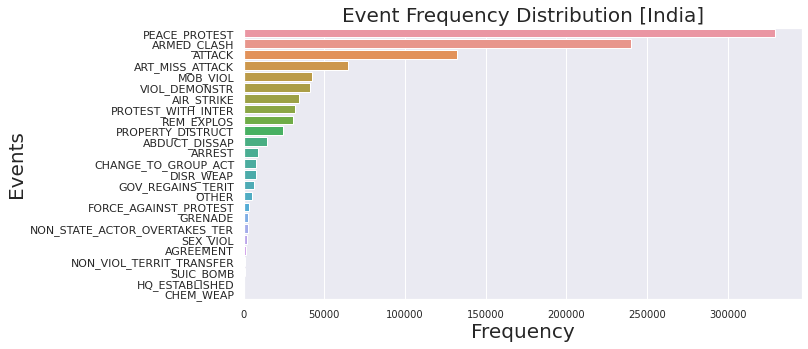

In [ ]:
sns.set_theme(style="darkgrid")
x = df['sub_event_type'].value_counts()
y = x.index
plt.figure(figsize=(10, 5))
g = sns.barplot(x=x, y=y)
plt.title("Event Frequency Distribution [India]", fontsize=20)
plt.ylabel('Events', fontsize= 20)
plt.yticks(fontsize=11)
plt.xlabel('Frequency', fontsize=20)
plt.xticks(fontsize=10)
plt.show()

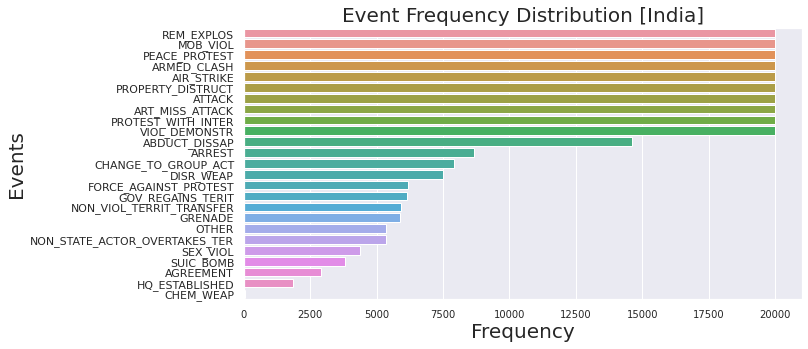

In [ ]:
sns.set_theme(style="darkgrid")
x = balanced_df.Labels.value_counts()
y = x.index
plt.figure(figsize=(10, 5))
g = sns.barplot(x=x, y=y)
plt.title("Event Frequency Distribution [India]", fontsize=20)
plt.ylabel('Events', fontsize= 20)
plt.yticks(fontsize=11)
plt.xlabel('Frequency', fontsize=20)
plt.xticks(fontsize=10)
plt.show()

In [ ]:
balanced_df['NumLabel'] = balanced_df.Labels.apply(text_to_numerical_category)

In [ ]:
balanced_df.head()

,Text,Labels,NumLabel
0,naf rebel force fired heavy machine gun grenad...,ART_MISS_ATTACK,0
1,regime ground force shelled town alrashdeen ne...,ART_MISS_ATTACK,0
2,turkish force opposition rebel operation peace...,ART_MISS_ATTACK,0
3,may naf rebel force fired grenade launcher gov...,ART_MISS_ATTACK,0
4,prohouthi force reportedly fired artillery she...,ART_MISS_ATTACK,0


# RoBERTa

In [ ]:
max_classes = len(balanced_df.Labels.unique())
max_length = 128

In [ ]:
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification

# Same as before
checkpoint = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(checkpoint, max_length=max_length)

## Hyperparametrs

In [ ]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay

EPOCHS = 3
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
batch_size = 32

num_train_steps =  len((balanced_df.NumLabel) // batch_size) * EPOCHS
lr_scheduler = PolynomialDecay(initial_learning_rate=5e-5,
                               end_learning_rate=0.,
                               decay_steps=num_train_steps
                               )

from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=lr_scheduler)

## Tokenization

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
result_df = shuffle(balanced_df)

In [ ]:
result_df

,Text,Labels,NumLabel
261563,jul santiago metropolitana explosive artifact ...,Disrupted weapons use,18
13941,prohouthi force reportedly fired artillery pla...,Shelling/artillery/missile attack,0
61723,th woman street vendor allegedly shot dead pol...,Attack,3
11146,taliban militant shelled afghan military base ...,Shelling/artillery/missile attack,0
45070,unknown number people staged small riot arnhem...,Violent demonstration,2
...,...,...,...
140982,hawker shut shop demonstrated street sector v ...,Protest with intervention,7
179345,property destruction martyr sorxwin roboski ve...,Looting/property destruction,9
31526,moron antigovernment group protested removal t...,Peaceful protest,1
107719,proximity krasnohorivka military force ukraine...,Armed clash,5


In [ ]:
# result_df.to_csv('resampled-training-data.csv', index=True)

In [ ]:
# result_df = pd.read_csv('/content/drive/MyDrive/Shared-Task-2021/resampled-training-data-ggod.csv', index_col=0)
# result_df

FileNotFoundError: ignored

### Train-Test-Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(result_df.Text, result_df.NumLabel, test_size = 0.1, random_state = 42, stratify =result_df.NumLabel)

### Label Encoding

In [ ]:
max_classes = len(balanced_df.Labels.unique())
print(max_classes)

25


In [ ]:
%%time
encoded_labels_train = to_categorical(Y_train, num_classes=max_classes)
encoded_labels_test = to_categorical(Y_test, num_classes=max_classes)

CPU times: user 15.4 ms, sys: 1.06 ms, total: 16.4 ms
Wall time: 18.2 ms


### Input-Tokenization

In [ ]:
def roberta_encode(data,maximum_length) :
  input_ids = []
  attention_masks = []
  

  for i in tqdm(range(len(data))):
      encoded = tokenizer.encode_plus(
        
        data[i],
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        
        return_attention_mask=True,
        
      )
      
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

In [ ]:
%%time
train_inputs,train_attention_masks = roberta_encode(list(X_train), max_length)

  0%|          | 0/257967 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 257967/257967 [02:01<00:00, 2122.07it/s]


CPU times: user 2min 2s, sys: 5.87 s, total: 2min 8s
Wall time: 2min 9s


In [ ]:
test_inputs,test_attention_masks = roberta_encode(list(X_test), max_length)

  0%|          | 0/28664 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 28664/28664 [00:13<00:00, 2188.35it/s]


In [ ]:
# train_inputs = tokenizer(list(X_train), padding=True, truncation=True, return_tensors="np")

# train_inputs["labels"] = tf.reshape(tf.constant(encoded_labels_train), (len(list(X_train)), max_classes))

In [ ]:
len(X_train), len(X_test)

(257967, 28664)

In [ ]:
# test_inputs = tokenizer(list(X_test), padding=True, truncation=True, return_tensors="np")

# test_inputs["labels"] = tf.reshape(tf.constant(encoded_labels_test), (len(list(X_test)), max_classes)) 

### Tensorflow-Input-Pipeline

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(((train_inputs,train_attention_masks), encoded_labels_train)).shuffle(70000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices(((test_inputs,test_attention_masks), encoded_labels_test)).shuffle(70000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

## Custom Callbacks

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
!mkdir checkpoints

MyCheckpoint = ModelCheckpoint('RoBERTa-base.h5',
                               monitor = 'val_categorical_accuracy',
                               verbose = 1,
                               save_best_only = True,
                               mode='auto',
                               save_weights_only = True)

MyEarlyStopping = EarlyStopping(patience =1,
                                monitor='val_categorical_accuracy',
                                restore_best_weights = True,
                                verbose = 1)

import os
os.path.exists('/content/checkpoints')

True

## Class Weight Balancing

In [ ]:
from sklearn.utils import class_weight
class_weights_array = class_weight.compute_class_weight('balanced'
                                               ,np.unique(balanced_df.NumLabel)
                                               ,balanced_df.NumLabel)

class_weights_array

array([  0.573262  ,   0.573262  ,   0.573262  ,   0.573262  ,
         0.573262  ,   0.573262  ,   0.573262  ,   0.573262  ,
         1.85042608,   0.573262  ,   2.14183449,   0.573262  ,
         1.86487313,   0.78400164,   1.44671798,   2.14704869,
         1.32270881,   2.6104827 ,   1.52890252,   1.93212673,
         1.94457938,   6.14428725,   3.00924934,   3.92645205,
       191.08733333])

In [ ]:
class_weights = {i : class_weights_array[i] for i in range(len(class_weights_array))}
class_weights

{0: 0.573262,
 1: 0.573262,
 2: 0.573262,
 3: 0.573262,
 4: 0.573262,
 5: 0.573262,
 6: 0.573262,
 7: 0.573262,
 8: 1.8504260813428017,
 9: 0.573262,
 10: 2.141834485335326,
 11: 0.573262,
 12: 1.8648731294729994,
 13: 0.7840016411378555,
 14: 1.4467179810725552,
 15: 2.1470486891385767,
 16: 1.322708814028611,
 17: 2.6104826958105645,
 18: 1.528902520336045,
 19: 1.9321267273340075,
 20: 1.9445793758480325,
 21: 6.144287245444802,
 22: 3.009249343832021,
 23: 3.9264520547945208,
 24: 191.08733333333333}

## Building Model

### Defining Model Metrics

In [ ]:
# !pip install tensorflow_addons
import tensorflow_addons as tfa

macro_f1 = tfa.metrics.F1Score(num_classes=max_classes, average='macro')
micro_f1 = tfa.metrics.F1Score(num_classes=max_classes, average='micro')
weighted_f1 = tfa.metrics.F1Score(num_classes=max_classes, average='weighted')
precision = tf.metrics.Precision()
recall = tf.metrics.Recall()
categorical_accuracry = tf.metrics.CategoricalAccuracy()

class F1_metric(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        # Initialize our metric by initializing the two metrics it's based on:
        # Precision and Recall
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Update our metric by updating the two metrics it's based on
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

    def result(self):
        # To get the F1 result, we compute the harmonic mean of the current
        # precision and recall
        return 2 / ((1 / self.precision.result()) + (1 / self.recall.result())) 

F1Score = F1_metric()
metrics = [categorical_accuracry, F1Score]


### Custom Model Creation

In [ ]:
def create_model(roberta_model):
  input_ids = tf.keras.Input(shape=(max_length,),dtype='int32')
  attention_masks = tf.keras.Input(shape=(max_length,),dtype='int32')
  
  output = roberta_model([input_ids,attention_masks])
  output = output[1]
  output = tf.keras.layers.Dense(32,activation='relu')(output)
  output = tf.keras.layers.Dropout(0.2)(output)

  output = tf.keras.layers.Dense(units=max_classes,activation='softmax')(output)
  model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
  model.compile(optimizer= opt,
              loss= loss,
              metrics = metrics)
  return model

## Model Summary

In [ ]:
from transformers import TFRobertaModel
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

model = create_model(roberta_model)
model.summary()

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           24608       tf_roberta_model[0][1]       

In [ ]:
model.load_weights('/content/drive/MyDrive/Shared Task 2021/RoBERTa-base-epoch-2.h5')

## Model Training

In [ ]:
%%time
history = model.fit([train_inputs,train_attention_masks], encoded_labels_train, 
                    validation_data=([test_inputs, test_attention_masks], encoded_labels_test),
                    epochs = EPOCHS,
                    batch_size = batch_size,
                    verbose = 1,
                    class_weight=class_weights,
                    callbacks = [MyCheckpoint, MyEarlyStopping]
                    )

Epoch 1/3
8062/8062 [==============================] - 4102s 506ms/step - loss: 0.9153 - categorical_accuracy: 0.7533 - f1_score: 0.7492 - val_loss: 0.4424 - val_categorical_accuracy: 0.8923 - val_f1_score: 0.8939

Epoch 00001: val_categorical_accuracy improved from -inf to 0.89234, saving model to RoBERTa-base.h5
Epoch 2/3
8062/8062 [==============================] - 4074s 505ms/step - loss: 0.4927 - categorical_accuracy: 0.8789 - f1_score: 0.8767 - val_loss: 0.3644 - val_categorical_accuracy: 0.9134 - val_f1_score: 0.9137

Epoch 00002: val_categorical_accuracy improved from 0.89234 to 0.91341, saving model to RoBERTa-base.h5
Epoch 3/3
8062/8062 [==============================] - 4072s 505ms/step - loss: 0.3891 - categorical_accuracy: 0.9022 - f1_score: 0.9009 - val_loss: 0.9131 - val_categorical_accuracy: 0.8140 - val_f1_score: 0.8235

Epoch 00003: val_categorical_accuracy did not improve from 0.91341
Restoring model weights from the end of the best epoch.
Epoch 00003: early stopping

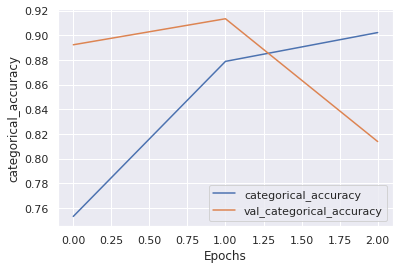

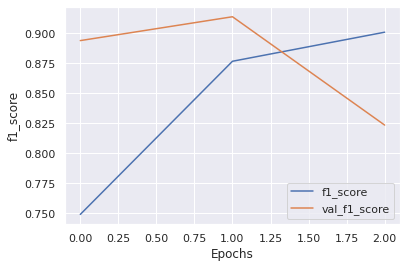

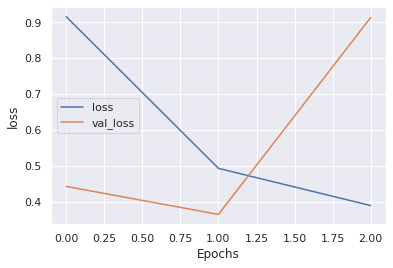

In [ ]:
import matplotlib.pyplot as plt 
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "categorical_accuracy")
plot_graphs(history, "f1_score")
plot_graphs(history, 'loss')


In [ ]:
model.save('BERT-Model.h5')

In [ ]:
test_file = pd.read_csv('/content/drive/MyDrive/Shared Task 2021/test-set-with-labels-cleaned.txt', index_col=0)

In [ ]:
test_file.head()

,EventSnippet,SubType,processed
id,,,
1,The US warplanes pounded the village of Kashka...,AIR_STRIKE,u warplane pounded village kashkash southern p...
3,Officers brutally attacked and injured a peace...,FORCE_AGAINST_PROTEST,officer brutally attacked injured peaceful stu...
4,"On December 13, ISIS fighters recaptured the v...",NON_STATE_ACTOR_OVERTAKES_TER,isi fighter recaptured village kashma syrian a...
5,Vice-President Mike Pence said Thursday that t...,AGREEMENT,vice-president mike penny said thursday mainly...
6,A helicopter on Thursday is said to have dropp...,CHEM_WEAP,helicopter thursday said dropped container tox...


In [ ]:
final_test_inputs, final_test_attention_masks = roberta_encode(list(test_file.processed), max_length)

  0%|          | 0/829 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 829/829 [00:00<00:00, 1648.12it/s]


In [ ]:
y_preds = np.argmax(model.predict([final_test_inputs, final_test_attention_masks]), axis=1)

In [ ]:
y_preds

array([ 4,  8, 15, 23, 10, 10,  1, 15, 19, 14,  9, 10,  1, 14, 20,  2, 18,
        8,  6,  3,  5,  0, 20,  3, 19,  6,  2, 18,  6, 18,  5,  0, 20, 21,
       23, 20, 10, 22, 23, 13, 20, 18, 22, 18, 18,  5,  9,  8,  3, 10, 19,
        9, 15, 11, 19, 16, 19, 17,  5,  9, 16,  3, 13,  5,  6,  2,  5, 18,
        6, 17,  7,  1,  4, 20, 17, 19, 19,  8,  8, 21, 20, 20,  1,  3,  0,
        2,  2,  1,  6, 18,  3, 13,  9,  0,  8, 18,  2,  7,  1, 12,  8, 20,
       23,  0, 10, 15,  1,  3,  7,  2, 16,  5,  6, 12, 15,  4, 20,  5,  8,
       23,  6,  6, 20,  8,  6,  0, 13, 14,  1,  0, 21,  0, 13, 15,  1,  5,
        0, 16, 11, 14,  1,  6,  6,  0,  4,  0, 18,  1,  3, 10,  5, 13, 23,
       23, 16, 14, 21, 13, 19, 15, 18, 10,  3, 18,  3,  0, 11, 19,  4,  9,
       11,  3,  5, 19, 21,  1,  7, 19, 10, 11, 18,  3, 11, 11,  1, 20, 22,
        5, 13, 20, 10, 20, 22, 19,  6, 22,  8, 20, 14, 15, 18, 22, 22, 22,
        8, 11, 17, 10, 15, 20, 10,  2,  1, 12, 15, 16,  7,  7, 17, 10,  1,
        1,  1,  6,  5, 22

In [ ]:
test_file['pred-labels'] = y_preds

In [ ]:
test_file.head()

,EventSnippet,SubType,processed,pred-labels
id,,,,
1,The US warplanes pounded the village of Kashka...,AIR_STRIKE,u warplane pounded village kashkash southern p...,4
3,Officers brutally attacked and injured a peace...,FORCE_AGAINST_PROTEST,officer brutally attacked injured peaceful stu...,8
4,"On December 13, ISIS fighters recaptured the v...",NON_STATE_ACTOR_OVERTAKES_TER,isi fighter recaptured village kashma syrian a...,15
5,Vice-President Mike Pence said Thursday that t...,AGREEMENT,vice-president mike penny said thursday mainly...,23
6,A helicopter on Thursday is said to have dropp...,CHEM_WEAP,helicopter thursday said dropped container tox...,10


In [ ]:
def num_to_text_labels(num):
    text = event_types_dict_inverse[num]
    return text

test_file['text-labels'] = test_file['pred-labels'].apply(num_to_text_labels)

In [ ]:
test_file.head()

,EventSnippet,SubType,processed,pred-labels,text-labels
id,,,,,
1,The US warplanes pounded the village of Kashka...,AIR_STRIKE,u warplane pounded village kashkash southern p...,4,AIR_STRIKE
3,Officers brutally attacked and injured a peace...,FORCE_AGAINST_PROTEST,officer brutally attacked injured peaceful stu...,8,FORCE_AGAINST_PROTEST
4,"On December 13, ISIS fighters recaptured the v...",NON_STATE_ACTOR_OVERTAKES_TER,isi fighter recaptured village kashma syrian a...,15,NON_STATE_ACTOR_OVERTAKES_TER
5,Vice-President Mike Pence said Thursday that t...,AGREEMENT,vice-president mike penny said thursday mainly...,23,AGREEMENT
6,A helicopter on Thursday is said to have dropp...,CHEM_WEAP,helicopter thursday said dropped container tox...,10,OTHER


In [ ]:
test_file.to_csv('final.txt', sep='\t', index=False)

In [ ]:
trrr = pd.read_csv('final.tsv', sep='\t')

In [ ]:
trrr.head()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true= list(test_file.SubType), y_pred= list(test_file['text-labels'])))

                               precision    recall  f1-score   support

                ABDUCT_DISSAP       0.65      0.85      0.74        20
                    AGREEMENT       1.00      0.74      0.85        31
                   AIR_STRIKE       0.89      0.67      0.76        36
                  ARMED_CLASH       0.84      0.64      0.72        66
                       ARREST       0.88      0.65      0.75        34
              ART_MISS_ATTACK       0.65      0.89      0.75        36
                       ATTACK       0.67      0.81      0.73        27
          CHANGE_TO_GROUP_ACT       0.67      0.60      0.63        30
                    CHEM_WEAP       0.00      0.00      0.00        37
                    DISR_WEAP       0.92      0.79      0.85        58
        FORCE_AGAINST_PROTEST       0.41      0.61      0.49        23
            GOV_REGAINS_TERIT       0.33      0.05      0.09        38
                      GRENADE       0.83      0.94      0.88        48
     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
